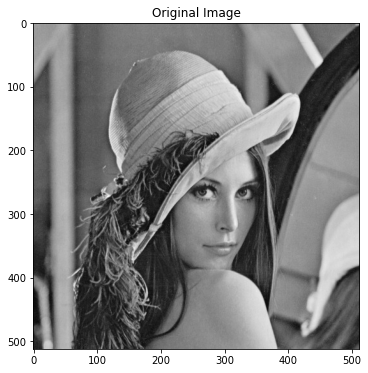

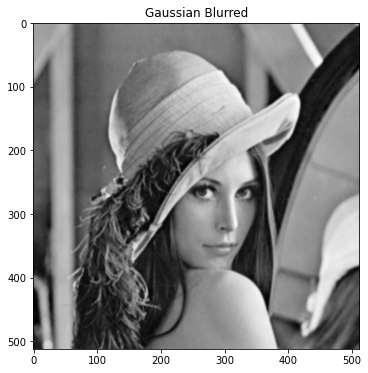

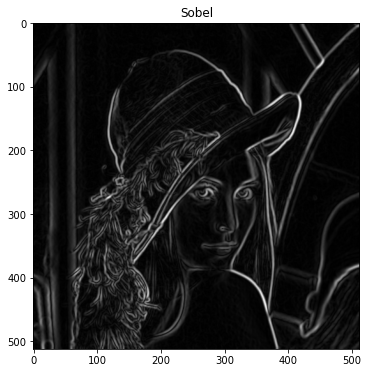

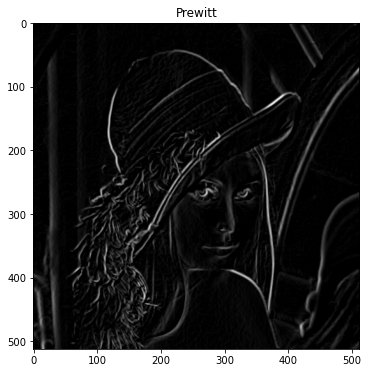

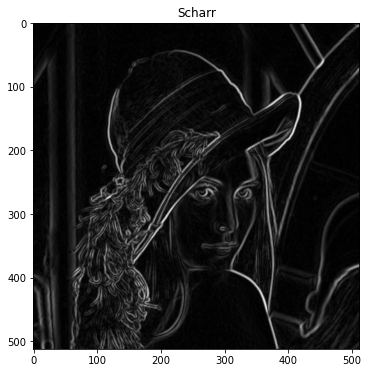

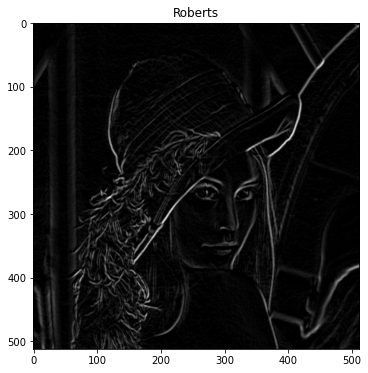

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlopen
from skimage.util import montage

def url_to_image(url, readFlag=cv2.IMREAD_GRAYSCALE):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image

# Load a sample image
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
img = url_to_image(url)

# Apply Gaussian filter
gaussian_blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Sobel filter
sobel_x = cv2.Sobel(gaussian_blurred, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gaussian_blurred, cv2.CV_64F, 0, 1, ksize=5)
sobel = np.hypot(sobel_x, sobel_y)

# Apply Prewitt filter
prewitt_x = cv2.filter2D(gaussian_blurred, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(gaussian_blurred, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt = np.hypot(prewitt_x, prewitt_y)

# Apply Scharr filter
scharr_x = cv2.Scharr(gaussian_blurred, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(gaussian_blurred, cv2.CV_64F, 0, 1)
scharr = np.hypot(scharr_x, scharr_y)

# Apply Roberts filter
roberts_x = cv2.filter2D(gaussian_blurred, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(gaussian_blurred, -1, np.array([[0, 1], [-1, 0]]))
roberts = np.hypot(roberts_x, roberts_y)

# Display images
images = [img, gaussian_blurred, sobel, prewitt, scharr, roberts]
titles = ["Original Image", "Gaussian Blurred", "Sobel", "Prewitt", "Scharr", "Roberts"]

for index in range(0,len(images)):
    plt.imshow(images[index], cmap='gray')
    plt.title(titles[index]) 
    plt.rcParams["figure.figsize"] = (40,6)
    plt.show()
